# Deploy Model Livello di Acqua

In [1]:
import pandas as pd
import numpy as np
import os
import pickle
from statsmodels.tsa.seasonal import seasonal_decompose
def season_of_date(date):
    year = str(date.year)
    seasons = {'spring': pd.date_range(start='21/03/'+year, end='20/06/'+year),
               'summer': pd.date_range(start='21/06/'+year, end='22/09/'+year),
               'autumn': pd.date_range(start='23/09/'+year, end='20/12/'+year)}
    if date in seasons['spring']:
        return 'spring'
    if date in seasons['summer']:
        return 'summer'
    if date in seasons['autumn']:
        return 'autumn'
    else:
        return 'winter'



In [2]:
def seas(data, dum):
  data.loc[-1,dum]=1
  


In [3]:
def prep_data_for_deploy(data):
  
  data['Data'] = pd.to_datetime(data['Data'], format="%d/%m/%Y")
  
  data['season'] = data.Data.map(season_of_date)
  data['spring'] = 0
  data['winter'] = 0
  data['autumn'] = 0
  data['summer'] = 0
  stag = data.loc[len(data)-1,'season']
  data[stag] = 1

  
  data.drop('season', axis=1, inplace=True)
  data['month'] = data['Data'].dt.month
  data['year'] = data['Data'].dt.year
  
  data['Pioggia_mediana'] = data[['Pioggia_Zona_1', 'Pioggia_Zona_2', 'Pioggia_Zona_3',
        'Pioggia_Zona_4', 'Pioggia_Zona_5']].median(axis = 1)
  data['Pioggia_std'] = data[['Pioggia_Zona_1', 'Pioggia_Zona_2', 'Pioggia_Zona_3',
        'Pioggia_Zona_4', 'Pioggia_Zona_5']].std(axis = 1)
  
  for i in range(0,7):
    data['Livello_Acqua_lag'+str(i)]=data['Livello_Acqua'].shift(+i)

  data['Livello_Acqua_mediana'] = data[['Livello_Acqua_lag0','Livello_Acqua_lag1', 'Livello_Acqua_lag2', 'Livello_Acqua_lag3',
        'Livello_Acqua_lag4', 'Livello_Acqua_lag5', 'Livello_Acqua_lag6']].median(axis = 1)
  
  data['Livello_Acqua_std'] = data[['Livello_Acqua_lag0','Livello_Acqua_lag1', 'Livello_Acqua_lag2', 'Livello_Acqua_lag3',
        'Livello_Acqua_lag4', 'Livello_Acqua_lag5', 'Livello_Acqua_lag6']].std(axis = 1)

  return data.iloc[[-1]][['Data','Pioggia_Zona_1', 'Pioggia_Zona_2', 'Pioggia_Zona_3', 'Pioggia_Zona_4',
       'Pioggia_Zona_5', 'Temperatura_Zona_5','Portata_Uscita','autumn','spring', 'summer', 'winter', 'month', 'year', 'Pioggia_mediana',
       'Pioggia_std', 'Livello_Acqua_lag0', 'Livello_Acqua_lag1',
       'Livello_Acqua_lag2', 'Livello_Acqua_lag3', 'Livello_Acqua_lag4',
       'Livello_Acqua_lag5', 'Livello_Acqua_lag6', 'Livello_Acqua_mediana',
       'Livello_Acqua_std']]

In [4]:
os.chdir("../")
print(os.getcwd())

c:\Users\nabil\Downloads\Progetto_industry


In [5]:
data = pd.read_csv('Data/Inference/infer_LA.csv').drop('Unnamed: 0', axis=1)

In [6]:
x = prep_data_for_deploy(data)
x['Data'] = pd.to_datetime(x['Data'], format="%Y-%m-%d")
x.set_index('Data', inplace=True)

c:\Users\nabil\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\base.py:880: UserWarning: Parsing '21/03/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  new_values = map_f(values, mapper)
c:\Users\nabil\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\base.py:880: UserWarning: Parsing '20/06/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  new_values = map_f(values, mapper)
c:\Users\nabil\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\base.py:880: UserWarning: Parsing '21/06/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  new_values = map_f(values, mapper)
c:\Users\nabil\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\base.py:880: UserWarning: Parsing '22/09/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_f

In [7]:
x

,Pioggia_Zona_1,Pioggia_Zona_2,Pioggia_Zona_3,Pioggia_Zona_4,Pioggia_Zona_5,Temperatura_Zona_5,Portata_Uscita,autumn,spring,summer,...,Pioggia_std,Livello_Acqua_lag0,Livello_Acqua_lag1,Livello_Acqua_lag2,Livello_Acqua_lag3,Livello_Acqua_lag4,Livello_Acqua_lag5,Livello_Acqua_lag6,Livello_Acqua_mediana,Livello_Acqua_std
Data,,,,,,,,,,,,,,,,,,,,,
2020-06-30,0.0,0.0,0.0,0.0,0.0,22.75,0.6,0,0,1,...,0.0,29.8,29.82,29.83,29.84,29.85,29.87,29.86,29.84,0.024103


In [8]:
x.columns

Index(['Pioggia_Zona_1', 'Pioggia_Zona_2', 'Pioggia_Zona_3', 'Pioggia_Zona_4',
       'Pioggia_Zona_5', 'Temperatura_Zona_5', 'Portata_Uscita', 'autumn',
       'spring', 'summer', 'winter', 'month', 'year', 'Pioggia_mediana',
       'Pioggia_std', 'Livello_Acqua_lag0', 'Livello_Acqua_lag1',
       'Livello_Acqua_lag2', 'Livello_Acqua_lag3', 'Livello_Acqua_lag4',
       'Livello_Acqua_lag5', 'Livello_Acqua_lag6', 'Livello_Acqua_mediana',
       'Livello_Acqua_std'],
      dtype='object')

In [9]:
xgb = pickle.load(open('Models/XGB_model_LA.sav', 'rb'))

In [10]:
prediction = xgb.predict(x)

In [11]:
round(prediction[0],2)

29.75

In [12]:
data = pd.read_csv('Data/Original/Bacino_idrico.csv')[['Data','Livello_Acqua']]
new = pd.DataFrame({'Data': '07/07/2020', 'Livello_Acqua_Predetto': round(prediction[0],2)}, index=[0])
data['Data'] = pd.to_datetime(data['Data'], format="%d/%m/%Y")
new['Data'] = pd.to_datetime(new['Data'], format="%d/%m/%Y")
data.set_index('Data', inplace=True)
new.set_index('Data', inplace=True)

final = pd.concat([data,new])
final = final[(final.index>'2020-01-01')]

In [13]:
final

,Livello_Acqua,Livello_Acqua_Predetto
Data,,
2020-01-02,28.86,NaN
2020-01-03,28.75,NaN
2020-01-04,28.66,NaN
2020-01-05,28.56,NaN
2020-01-06,28.44,NaN
...,...,...
2020-06-27,29.84,NaN
2020-06-28,29.83,NaN
2020-06-29,29.82,NaN


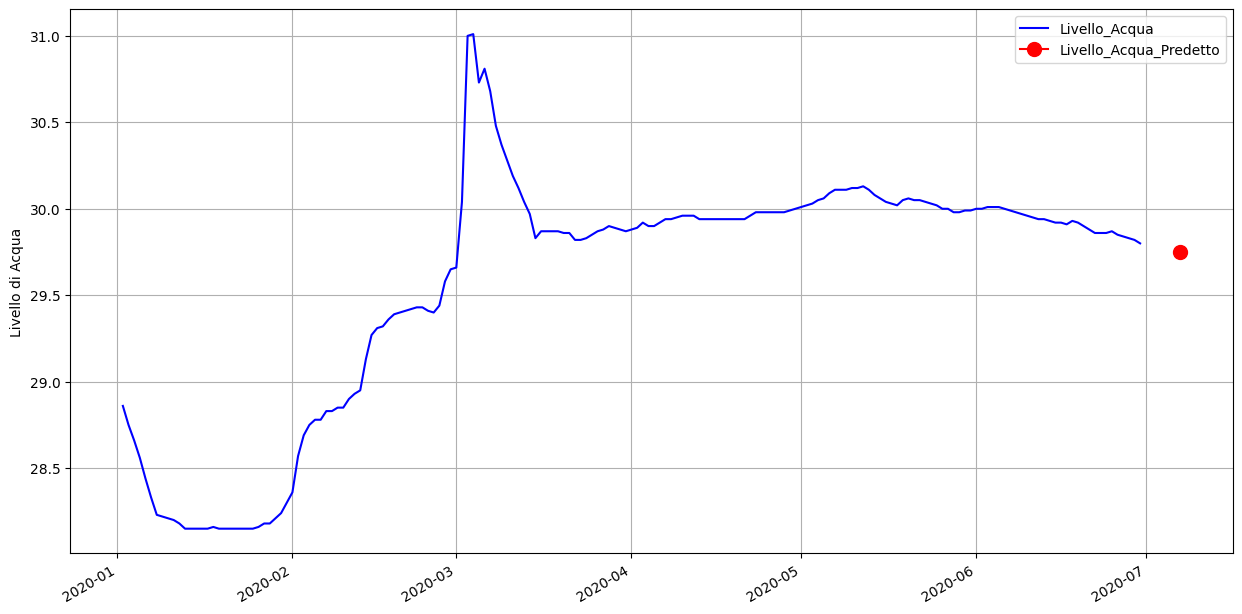

In [14]:
title=''
ylabel='Livello di Acqua'
xlabel='' 
final.columns = ['Livello_Acqua', 'Livello_Acqua_Predetto']
ax = final['Livello_Acqua'].plot(legend=True,figsize=(15,8),title=title, color = 'blue')
final['Livello_Acqua_Predetto'].plot(legend=True, marker='o', markersize=10, color='red')
#current_values = plt.gca().get_yticks()
ax.yaxis.grid(True)
ax.xaxis.grid(True)
# ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

# Deploy Model Portata Uscita

In [15]:
def prep_temporal(data):
  data['Data'] = pd.to_datetime(data['Data'], format="%d/%m/%Y")
  data['year'] = data.Data.dt.year
  data['month'] = data.Data.dt.month
  data['day_in_year'] = data.Data.dt.dayofyear
  data['week_in_year'] = data.Data.dt.isocalendar().week.astype(int)
  data['season'] = data.Data.map(season_of_date)
  seas = pd.get_dummies(data['season'])
  data = pd.concat([data,seas], axis=1)
  data.drop('season', axis=1, inplace=True)
  return(data)
  
def prep_decompose(data):
  decompose_result = seasonal_decompose(data.Temperatura_Zona_5, period=365) 
  data['Temperatura_Trend'] = decompose_result.trend
  data['Temperatura_Season'] = decompose_result.seasonal
  data['Temperatura_Resid'] = decompose_result.resid
  return(data)


def prep_shift(data):
  data.set_index('Data',inplace = True)
  data.sort_index(inplace = True)
  data_shift1 = data[['Pioggia_Zona_1', 'Pioggia_Zona_2', 'Pioggia_Zona_3', 'Pioggia_Zona_4', 'Pioggia_Zona_5', 
                       'Livello_Acqua', 'Portata_Uscita']].diff(periods = 1).add_suffix('_diff_1')
  data_shift2 = data[['Pioggia_Zona_1', 'Pioggia_Zona_2', 'Pioggia_Zona_3', 'Pioggia_Zona_4', 'Pioggia_Zona_5', 
                       'Livello_Acqua', 'Portata_Uscita']].diff(periods = 2).add_suffix('_diff_2')
  data_shift3 = data[['Pioggia_Zona_1', 'Pioggia_Zona_2', 'Pioggia_Zona_3', 'Pioggia_Zona_4', 'Pioggia_Zona_5', 
                       'Livello_Acqua', 'Portata_Uscita']].diff(periods = 3).add_suffix('_diff_3')
  data_shift4 = data[['Pioggia_Zona_1', 'Pioggia_Zona_2', 'Pioggia_Zona_3', 'Pioggia_Zona_4', 'Pioggia_Zona_5', 
                       'Livello_Acqua', 'Portata_Uscita']].diff(periods = 4).add_suffix('_diff_4')
  data_shift5 = data[['Pioggia_Zona_1', 'Pioggia_Zona_2', 'Pioggia_Zona_3', 'Pioggia_Zona_4', 'Pioggia_Zona_5', 
                       'Livello_Acqua', 'Portata_Uscita']].diff(periods = 5).add_suffix('_diff_5')
  data_shift6 = data[['Pioggia_Zona_1', 'Pioggia_Zona_2', 'Pioggia_Zona_3', 'Pioggia_Zona_4', 'Pioggia_Zona_5', 
                       'Livello_Acqua', 'Portata_Uscita']].diff(periods = 6).add_suffix('_diff_6')
  data_shift7 = data[['Temperatura_Trend','Temperatura_Season','Temperatura_Resid']].shift(1).add_suffix('_shifted')
  data_shift8 = data[['Livello_Acqua', 'Portata_Uscita']].shift(30).add_suffix('_shifted')
  return(data_shift1, data_shift2, data_shift3, data_shift4, data_shift5, data_shift6, data_shift7, data_shift8)


def prep_final(data):
  data_temp = prep_temporal(data)
  data_deco = prep_decompose(data_temp)
  data_shift1, data_shift2, data_shift3, data_shift4, data_shift5, data_shift6, data_shift7, data_shift8 = prep_shift(data_deco)
  final_data = pd.concat([data_deco, data_shift1, data_shift2, data_shift3, data_shift4, data_shift5, data_shift6, data_shift7, data_shift8],axis = 1).dropna().iloc[1:]
  return(final_data.iloc[[-1]][['Pioggia_Zona_1', 'Pioggia_Zona_2', 'Pioggia_Zona_3', 'Pioggia_Zona_4',
       'Pioggia_Zona_5', 'Temperatura_Zona_5', 'Livello_Acqua', 'autumn',
       'spring', 'summer', 'winter', 'year', 'month', 'day_in_year',
       'week_in_year', 'Temperatura_Trend', 'Temperatura_Season',
       'Temperatura_Resid', 'Pioggia_Zona_1_diff_1', 'Pioggia_Zona_2_diff_1',
       'Pioggia_Zona_3_diff_1', 'Pioggia_Zona_4_diff_1',
       'Pioggia_Zona_5_diff_1', 'Livello_Acqua_diff_1',
       'Portata_Uscita_diff_1', 'Pioggia_Zona_1_diff_2',
       'Pioggia_Zona_2_diff_2', 'Pioggia_Zona_3_diff_2',
       'Pioggia_Zona_4_diff_2', 'Pioggia_Zona_5_diff_2',
       'Livello_Acqua_diff_2', 'Portata_Uscita_diff_2',
       'Pioggia_Zona_1_diff_3', 'Pioggia_Zona_2_diff_3',
       'Pioggia_Zona_3_diff_3', 'Pioggia_Zona_4_diff_3',
       'Pioggia_Zona_5_diff_3', 'Livello_Acqua_diff_3',
       'Portata_Uscita_diff_3', 'Pioggia_Zona_1_diff_4',
       'Pioggia_Zona_2_diff_4', 'Pioggia_Zona_3_diff_4',
       'Pioggia_Zona_4_diff_4', 'Pioggia_Zona_5_diff_4',
       'Livello_Acqua_diff_4', 'Portata_Uscita_diff_4',
       'Pioggia_Zona_1_diff_5', 'Pioggia_Zona_2_diff_5',
       'Pioggia_Zona_3_diff_5', 'Pioggia_Zona_4_diff_5',
       'Pioggia_Zona_5_diff_5', 'Livello_Acqua_diff_5',
       'Portata_Uscita_diff_5', 'Pioggia_Zona_1_diff_6',
       'Pioggia_Zona_2_diff_6', 'Pioggia_Zona_3_diff_6',
       'Pioggia_Zona_4_diff_6', 'Pioggia_Zona_5_diff_6',
       'Livello_Acqua_diff_6', 'Portata_Uscita_diff_6',
       'Temperatura_Trend_shifted', 'Temperatura_Season_shifted',
       'Temperatura_Resid_shifted', 'Livello_Acqua_shifted',
       'Portata_Uscita_shifted']])

In [16]:
data = pd.read_csv('Data/Inference/infer_PU.csv').drop('Unnamed: 0', axis=1)

In [17]:
data.columns

Index(['Data', 'Pioggia_Zona_1', 'Pioggia_Zona_2', 'Pioggia_Zona_3',
       'Pioggia_Zona_4', 'Pioggia_Zona_5', 'Temperatura_Zona_5',
       'Livello_Acqua', 'Portata_Uscita'],
      dtype='object')

In [18]:
data.head()

,Data,Pioggia_Zona_1,Pioggia_Zona_2,Pioggia_Zona_3,Pioggia_Zona_4,Pioggia_Zona_5,Temperatura_Zona_5,Livello_Acqua,Portata_Uscita
0,03/07/2015,0.0,0.0,0.0,0.0,0.0,26.15,30.30,0.6
1,04/07/2015,0.0,0.0,0.0,0.0,0.0,26.45,30.28,0.6
2,05/07/2015,0.0,0.0,0.0,0.0,0.0,27.50,30.27,0.6
3,06/07/2015,0.0,0.0,0.0,0.0,0.0,26.05,30.26,1.0
4,07/07/2015,0.0,0.0,0.2,0.0,0.0,26.45,30.24,1.0


In [19]:
x = prep_final(data)
x

c:\Users\nabil\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\base.py:880: UserWarning: Parsing '21/03/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  new_values = map_f(values, mapper)
c:\Users\nabil\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\base.py:880: UserWarning: Parsing '20/06/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  new_values = map_f(values, mapper)
c:\Users\nabil\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\base.py:880: UserWarning: Parsing '21/06/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  new_values = map_f(values, mapper)
c:\Users\nabil\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\base.py:880: UserWarning: Parsing '22/09/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_f

,Pioggia_Zona_1,Pioggia_Zona_2,Pioggia_Zona_3,Pioggia_Zona_4,Pioggia_Zona_5,Temperatura_Zona_5,Livello_Acqua,autumn,spring,summer,...,Pioggia_Zona_3_diff_6,Pioggia_Zona_4_diff_6,Pioggia_Zona_5_diff_6,Livello_Acqua_diff_6,Portata_Uscita_diff_6,Temperatura_Trend_shifted,Temperatura_Season_shifted,Temperatura_Resid_shifted,Livello_Acqua_shifted,Portata_Uscita_shifted
Data,,,,,,,,,,,,,,,,,,,,,
2019-12-31,0.0,0.0,0.0,0.0,0.0,5.8,28.94,0,0,0,...,0.0,-0.2,0.0,-0.66,-8.63,14.500411,-8.593814,-1.606597,29.17,9.58


In [20]:
x.columns

Index(['Pioggia_Zona_1', 'Pioggia_Zona_2', 'Pioggia_Zona_3', 'Pioggia_Zona_4',
       'Pioggia_Zona_5', 'Temperatura_Zona_5', 'Livello_Acqua', 'autumn',
       'spring', 'summer', 'winter', 'year', 'month', 'day_in_year',
       'week_in_year', 'Temperatura_Trend', 'Temperatura_Season',
       'Temperatura_Resid', 'Pioggia_Zona_1_diff_1', 'Pioggia_Zona_2_diff_1',
       'Pioggia_Zona_3_diff_1', 'Pioggia_Zona_4_diff_1',
       'Pioggia_Zona_5_diff_1', 'Livello_Acqua_diff_1',
       'Portata_Uscita_diff_1', 'Pioggia_Zona_1_diff_2',
       'Pioggia_Zona_2_diff_2', 'Pioggia_Zona_3_diff_2',
       'Pioggia_Zona_4_diff_2', 'Pioggia_Zona_5_diff_2',
       'Livello_Acqua_diff_2', 'Portata_Uscita_diff_2',
       'Pioggia_Zona_1_diff_3', 'Pioggia_Zona_2_diff_3',
       'Pioggia_Zona_3_diff_3', 'Pioggia_Zona_4_diff_3',
       'Pioggia_Zona_5_diff_3', 'Livello_Acqua_diff_3',
       'Portata_Uscita_diff_3', 'Pioggia_Zona_1_diff_4',
       'Pioggia_Zona_2_diff_4', 'Pioggia_Zona_3_diff_4',
       'Pi

In [21]:
xgb = pickle.load(open('Models/XGB_model_PU.sav', 'rb'))

In [22]:
prediction = xgb.predict(x)

In [23]:
round(prediction[0],2)

4.9

In [24]:
data = pd.read_csv('Data/Original/Bacino_idrico.csv')[['Data','Portata_Uscita']]
new = pd.DataFrame({'Data': '07/07/2020', 'Portata_Uscita_Predetto': round(prediction[0],2)}, index=[0])
data['Data'] = pd.to_datetime(data['Data'], format="%d/%m/%Y")
new['Data'] = pd.to_datetime(new['Data'], format="%d/%m/%Y")
data.set_index('Data', inplace=True)
new.set_index('Data', inplace=True)

final = pd.concat([data,new])
final = final[(final.index>'2020-01-01')]

In [25]:
final

,Portata_Uscita,Portata_Uscita_Predetto
Data,,
2020-01-02,7.2,NaN
2020-01-03,7.2,NaN
2020-01-04,7.2,NaN
2020-01-05,7.2,NaN
2020-01-06,7.2,NaN
...,...,...
2020-06-27,0.6,NaN
2020-06-28,0.6,NaN
2020-06-29,0.6,NaN


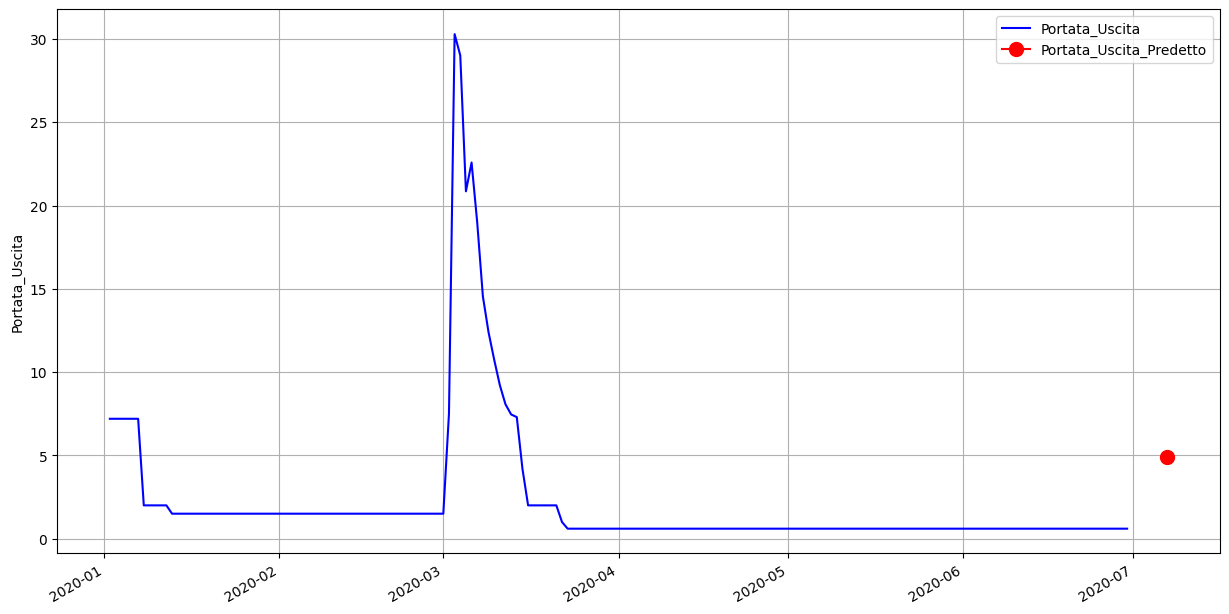

In [26]:
title=''
ylabel='Portata_Uscita'
xlabel='' 
final.columns = ['Portata_Uscita', 'Portata_Uscita_Predetto']
ax = final['Portata_Uscita'].plot(legend=True,figsize=(15,8),title=title, color = 'blue')
final['Portata_Uscita_Predetto'].plot(legend=True, marker='o', markersize=10, color='red')
#current_values = plt.gca().get_yticks()
ax.yaxis.grid(True)
ax.xaxis.grid(True)
# ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [27]:
data.head(1)

,Portata_Uscita
Data,
2003-01-06,9.6


In [28]:
l = data.copy()
l.reset_index(inplace=True)
l['month'] = l.Data.dt.month
l = l.loc[l['month']==7]
l.index = l.Data

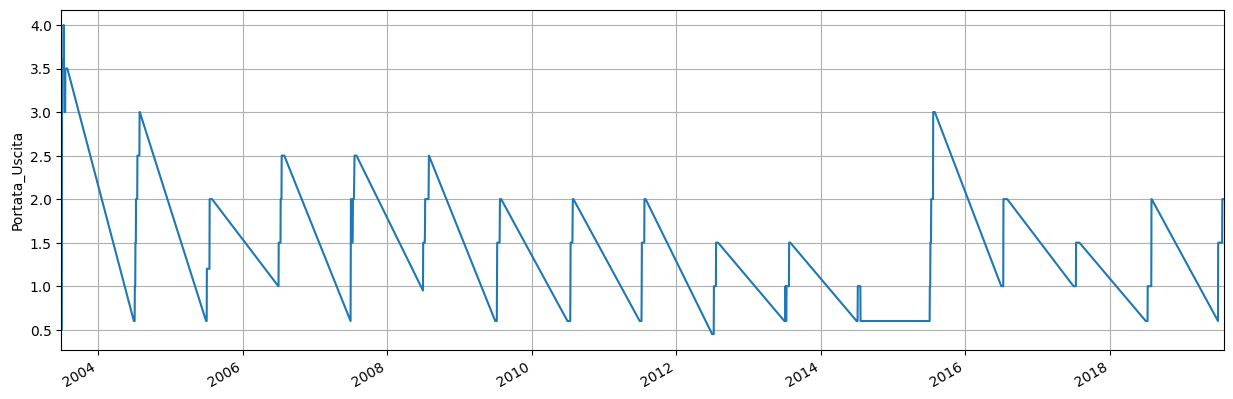

In [29]:
ax = l['Portata_Uscita'].plot(figsize=(15, 5),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')
ax.title.set_color('black')
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.yaxis.grid(True)
ax.xaxis.grid(True)
fig=ax.get_figure()